In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

In [2]:
np.random.seed(42)
n = 100
data = np.cumsum(np.random.randn(n))


In [3]:
data

array([  0.49671415,   0.35844985,   1.00613839,   2.52916825,
         2.29501487,   2.06087791,   3.64009073,   4.40752546,
         3.93805107,   4.48061112,   4.01719342,   3.55146367,
         3.79342594,   1.8801457 ,   0.15522787,  -0.40705966,
        -1.41989078,  -1.10564345,  -2.01366753,  -3.42597123,
        -1.96032246,  -2.18609876,  -2.11857056,  -3.54331874,
        -4.08770147,  -3.97677888,  -5.12777245,  -4.75207444,
        -5.35271313,  -5.64440688,  -6.24611349,  -4.3938353 ,
        -4.40733253,  -5.46504346,  -4.64249854,  -5.86334219,
        -5.6544786 ,  -7.61414872,  -8.94233477,  -8.74547354,
        -8.00700696,  -7.83563868,  -7.95128696,  -8.25239065,
        -9.73091264, -10.45075685, -10.91139562,  -9.8542734 ,
        -9.51065511, -11.27369526, -10.94961129, -11.33469357,
       -12.01161557, -11.39993929, -10.36893976,  -9.43765964,
       -10.27687717, -10.58608954, -10.25482611,  -9.27928098,
        -9.75845522,  -9.9441142 , -11.05044917, -12.24

In [4]:
train_size = int(len(data) * 0.8)
train,test = data[:train_size], data[train_size:]

In [6]:
def persistence_forecast(test, last_train_value):
    predictions = [last_train_value] * len(test)
    return predictions

persistence_preds = persistence_forecast(test, train[-1])
persistence_rmse = np.sqrt(mean_squared_error(test, persistence_preds))

In [9]:
persistence_rmse*100

92.46586762666911

ValueError: ' dashed' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

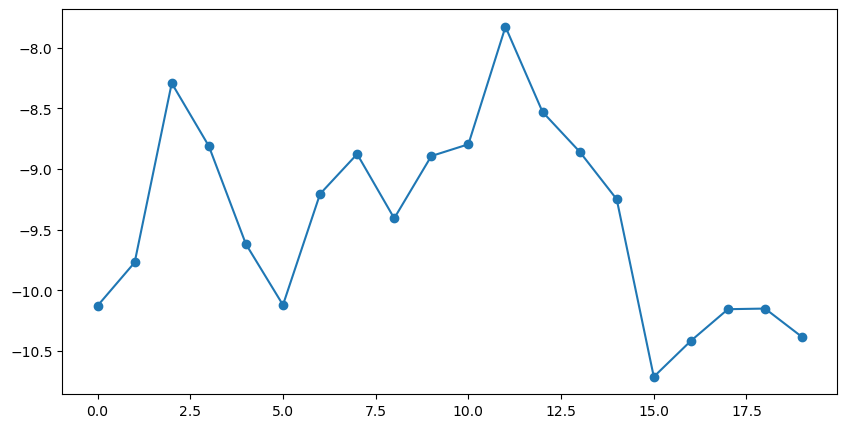

In [12]:
lag = 3
ar_model = AutoReg(train, lags = lag).fit()
ar_preds = ar_model.predict(start = len(train),end = len(data)-1)

ar_rmse = np.sqrt(mean_squared_error(test, ar_preds))

plt.figure(figsize = (10,5))
plt.plot(test, label = "Actual Values", marker = 'o')
plt.plot(persistence_preds, label = "Persistence Model", linestyle = ' dashed')
plt.plot(ar_preds, label = "Autoregression Model", linestyle = "dashed")
plt.legend()
plt.title("Comparison: Persistence vs AutoRegression")
plt.show()

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [14]:
np.random.seed(42)
n = 100
data = np.cumsum(np.random.randn(n))

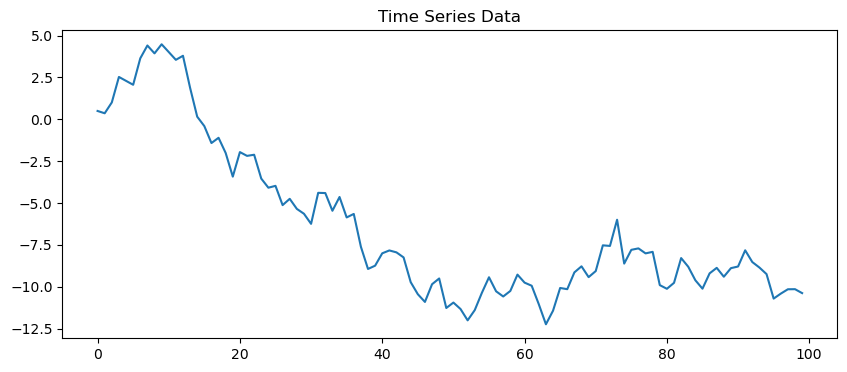

In [15]:
plt.figure(figsize = (10,4))
plt.plot(data)
plt.title("Time Series Data")
plt.show()

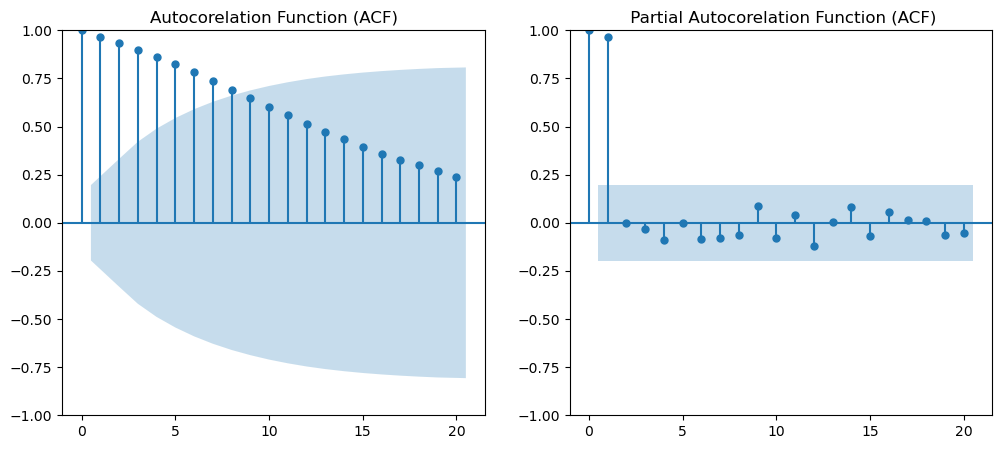

In [18]:
fig, axes = plt.subplots(1,2, figsize = (12, 5))
sm.graphics.tsa.plot_acf(data, lags = 20, ax=axes[0])
axes[0].set_title("Autocorelation Function (ACF)")
sm.graphics.tsa.plot_pacf(data, lags = 20 ,ax = axes[1])
axes[1].set_title(" Partial Autocorelation Function (ACF)")
plt.show()